# <span style="color:cyan">TP2 - ANALYSE TEMPS FRÉQUENCE ET PRINCIPE D'INCERTITUDE</span>

## <span style="color:cyan"><u>PRÉPARATION</u></span>

#### Soit (x[n]), n∈Z un signal audio (réel) discret. On désire calculer sa matrice de transformée de Fourier à Court-Terme (TFCT), notée 'xmat', à l’aide d’une fenêtre temporelle de taille 'Nwin', d’un pas d’avancement de la fenêtre noté 'Nhop' et pour chaque TFD d’un nombre de points fréquentiels noté 'Nfft'.
#### <u>1. Quelle condition imposer à Nhop et pourquoi ?

In [454]:
# 0<Nhop<=Nwin/2 si on veut avoir une fenetre qui glisse sur le signal sans sauter des parties. 
# Et restiuter le signal lors de l'algorithme de OLA.

#### <u>2. Quel(s) paramètre(s) modifier, et dans quel sens, pour améliorer la précision fréquentielle de la TFCT ? Justifier.


In [455]:
# Il faut augmenter le nombre de bins sans allonger la fenêtre d’observation donc on peut faire du zero-padding en ajoutant des zeros et donc augementer Nfft

#### <u>3. Quel(s) paramètre(s) modifier, et dans quel sens, pour améliorer la résolution fréquentielle de la TFCT ? Justifier.


In [456]:
# On peut simultanément à allonger la fenêtre d’observation et augmenter le nombre de bins et donc augementer Nwin

#### <u>4. Quel(s) paramètre(s) modifier, et dans quel sens, pour améliorer la résolution temporelle de la TFCT ? Justifier. Quel en sera l’impact sur la résolution fréquentielle ?

In [457]:
# Pour ameliorer la résolution temporelle on peut reduire Nwin car on pourra avoir une fenetre qui plus proche en taille des changements temporelle rapide. Cependant on réduit la résolution fréquentielle.

#### <u>5. Déterminer le nombre de colonnes, noté 'L', de 'xmat', correspondant au nombre de trames à extraire dans (x[n]), en fonction des paramètres 'Nwin' et 'Nhop'

In [458]:
# L = (Ntemp-Nwin)/Nhop il y a une TFD par colonne a chaque saut de Nhop et on soustrait par Nwin car a cause du debut et la fin du son. 
# avec Ntemp (N_temporel) le nombre d'echantillon du signal


#### <u>6. Montrer que la TFD, notée (X[k]) k∈[0..Nfft − 1], de chaque trame fenêtrée de (x[n]) vérifie : X[Nfft − k] = conj(X[k]), ∀k ∈ [1..Nfft − 1], où conj(X[k]) désigne le conjugué de X[k].

$$
X[k] = \sum_{n=0}^{N_{\text{fft}}-1} x[n]\, e^{-j2\pi kn / N_{\text{fft}}},
$$

conjugué de X[k] :
$$
\overline{X[k]} =
\sum_{n=0}^{N_{\text{fft}}-1} x[n]\, e^{+j2\pi kn / N_{\text{fft}}}.
$$

Or
$$
e^{+j2\pi kn / N_{\text{fft}}}
=
e^{-j2\pi (N_{\text{fft}}-k)n / N_{\text{fft}}}.
$$

En remplaçant, on obtient :
$$
\overline{X[k]} =
\sum_{n=0}^{N_{\text{fft}}-1} x[n]\, e^{-j2\pi (N_{\text{fft}}-k)n / N_{\text{fft}}}
= X[N_{\text{fft}}-k].
$$

On a une symétrie hermitienne


#### <u>7. En déduire le nombre de lignes de xmat, correspondant au nombre minimal de points fréquentiels utiles pour chaque TFD.

In [459]:
# Le nombre de ligne est egale a Nfft mais on peut prendre la moitié car on a une symétrie hermitienne
# et donc le nombre de ligne est egale a Nfft/2

## <span style="color:cyan"><u>EN SÉANCE</u></span>

### A. TRANSFORMÉE DE FOURIER À COURT-TERME (SHORT TERM FOURIER TRANSFORM)

#### La première partie sera dédiée à l’implémentation de la transformée de Fourier à Court-Terme (TFCT). La fonction, que l’on nommera tfct.py, aura pour paramètres d’entrée le chemin d’un fichier son, la taille de la fenêtre d’analyse Nwin, le pas d’avancement de la fenêtre d’analyse Nhop, le nombre de points fréquentiels Nfft utilisés pour la TFD. On supposera dans toute la suite et par défaut que Nfft = Nwin et Nhop = Nwin/2, et on travaillera avec une fenêtre de Hamming. Les paramètres de sortie seront la matrice TFCT du signal, notée xmat, ainsi que les vecteurs fréquentiels et temporels utiles à l’affichage de la TFCT. Cette première partie vise à réimplémenter les différentes étapes de la TFCT.

In [460]:
# NE PAS MODIFIER CETTE CELLULE
%matplotlib ipympl
import numpy as np
from IPython.display import display, Audio
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import sounddevice as sd
import soundfile as sf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Découpage du signal audio en trames de Nwin échantillons avec un pas d’avancement de Nhop échantillons. 

#### <u>1.1 Charger le signal audio sound.wav dans un vecteur qui sera noté xvect dans la suite du TP.

In [461]:
PATH='sound.wav'
Fs,xvect = wav.read(PATH)

#### <u>1.2 Isoler puis tracer l’allure temporelle d’une trame de xvect de longueur Nwin=1024, en fonction du temps en secondes. 

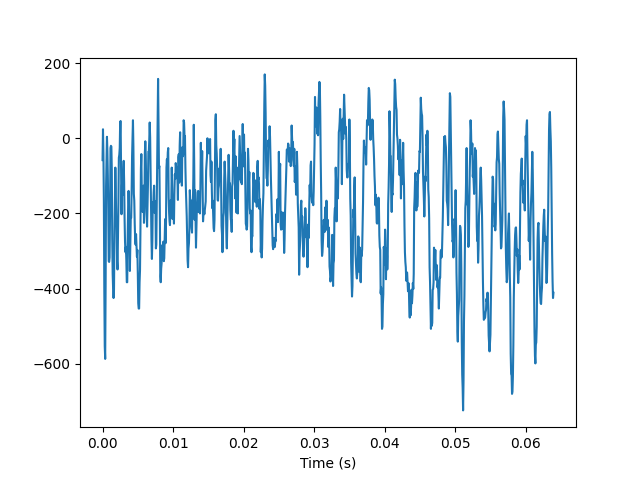

In [462]:
Nwin=1024
num_trame = 100
trame=xvect[Nwin*num_trame:Nwin*(num_trame+1)]
t_vect=np.arange(Nwin)/Fs
plt.figure()
plt.plot(t_vect,trame) #trame
plt.xlabel("Time (s)")
plt.show()

#### <u>1.3 Comparer cette trame de xvect avec la même trame fenêtrée par une fenêtre de Hamming.

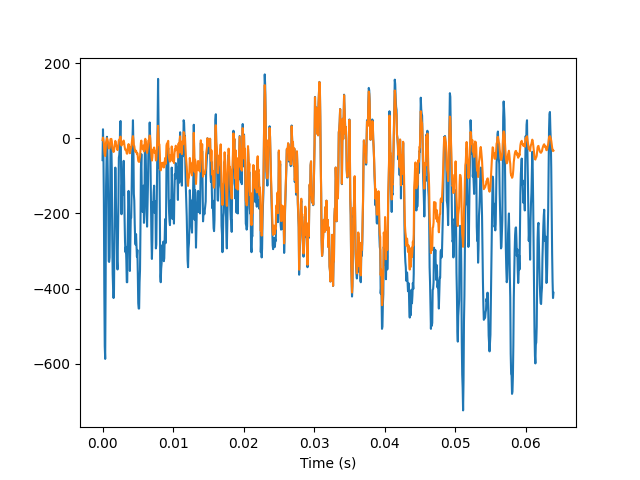

In [463]:
win=np.hamming(Nwin)
trame_fen= win*xvect[Nwin*num_trame:Nwin*(num_trame+1)]
plt.figure()
plt.plot(t_vect,trame) #trame
plt.plot(t_vect, trame_fen) #trame fenêtrée
plt.xlabel("Time (s)")
plt.show()

### 2. Transformée de Fourier Discrète (TFD) de la trame sur Nfft points fréquentiels.
#### <u>2.1 Tracer le spectre de la même trame de signal avant et après fenêtrage.

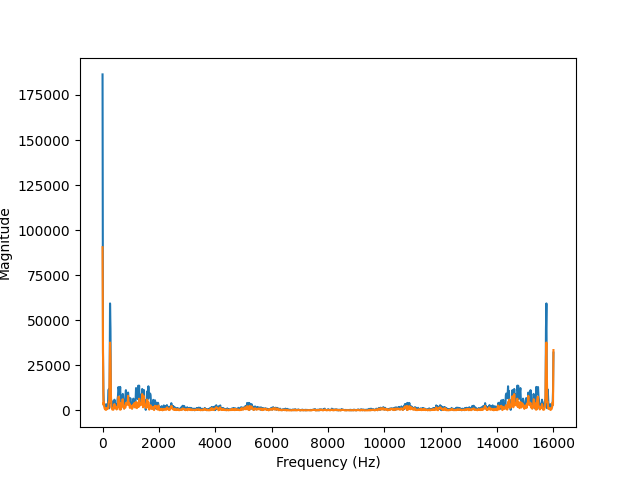

In [464]:
trame_fft = np.fft.fft(trame)
trame_fen_fft = np.fft.fft(trame_fen)
Nfft = len(trame_fft)
freq_vect=np.linspace(0, Fs, Nfft)
# freq_vect = np.fft.fftfreq(len(trame), d=1/Fs)
plt.figure()
plt.plot(freq_vect,np.abs(trame_fft))
plt.plot(freq_vect,np.abs(trame_fen_fft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


#### <u>2.2 Commenter l’effet du fenêtrage sur la TFD.

In [465]:
#

### 3. Transformée de Fourier à Court Terme (TFCT). 
#### On se propose de calculer les TFD de chaque trame et de les ranger dans les L colonnes de xmat.
#### <u>3.1  Déclarer la matrice xmat de TFCT initialement nulle.

In [466]:
Nhop=Nwin//2
nl= Nfft//2 + 1  #Nb de lignes de la matrice de TFCT (cf préparation)
nc= (len(xvect)-Nwin)//Nhop #Nb de colonnes de la matrice de TFCT (cf préparation)
xmat=np.zeros([nl,nc])

#### <u>3.2 Remplir les colonnes de xmat à l'aide d'une boucle 'for'.

In [467]:
for kk in range(0,nc):
    trame = win * xvect[kk*Nhop:(kk*Nhop)+Nwin]
    trame_fen_fft= np.abs(np.fft.fft(trame))
    xmat[:,kk]= trame_fen_fft[:nl]

#### <u>3.3 Tracer le spectrogramme obtenu après calcul de la TFCT, à l’aide de la fonction python plt.pcolormesh, en prenant soin de représenter l’axe des temps en secondes et l’axe des fréquences en Hertz.

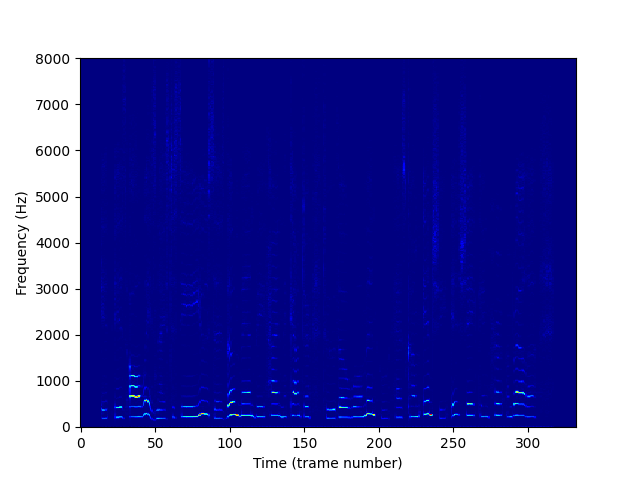

In [468]:
t_vect = np.arange(nc)
freq_vect=np.linspace(0, Fs, Nfft)

plt.figure()
plt.pcolormesh(t_vect, freq_vect[:nl], np.abs(xmat), cmap='jet') 
plt.xlabel('Time (trame number)')
plt.ylabel('Frequency (Hz)')
plt.show()

### 5. Fonction STFT (TFCT)
#### <u>5.1 Regrouper les lignes de code précédentes dans une fonction STFT(PATH,Nwin,Nhop,Nfft)

In [469]:
def TFCT(PATH,Nwin,Nhop,Nfft):
    Fs, xvect = wav.read(PATH)
    win=np.hamming(Nwin)
    nl= Nfft//2 + 1  #Nb de lignes de la matrice de TFCT 
    nc= (len(xvect)-Nwin)//Nhop #Nb de colonnes de la matrice de TFCT
    xmat=np.zeros([nl,nc])

    for kk in range(0,nc):
        trame = win * xvect[kk*Nhop:(kk*Nhop)+Nwin]
        trame_fen_fft= np.abs(np.fft.fft(trame))
        xmat[:,kk]= trame_fen_fft[:nl]

    t_tfct_vect = np.arange(nc)
    f_tfct_vect=np.linspace(0, Fs, Nfft)
    f_tfct_vect= f_tfct_vect[:nl]

    return t_tfct_vect, f_tfct_vect ,xmat

#### <u>5.2 Calculer la STFT du signal saxo.wav et commenter le spectrogramme.

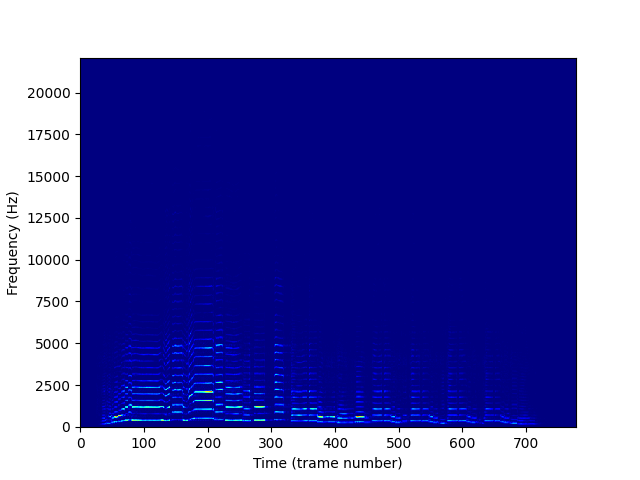

In [470]:
PATH= 'saxo.wav'
Nwin= 1024
Nhop= Nwin//2
Nfft= 1024 

t_tfct_vect, f_tfct_vect, xmat = TFCT(PATH,Nwin,Nhop,Nfft)
plt.figure()
plt.pcolormesh(t_tfct_vect, f_tfct_vect, np.abs(xmat), cmap='jet')
plt.xlabel('Time (trame number)')
plt.ylabel('Frequency (Hz)')
plt.show()

### B. PRINCIPE D'INCERTITUDE TEMPS-FRÉQUENCE
#### Nous allons maintenant étudier les propriétés temps-fréquence à partir de l’analyse de Fourier court-terme, donnant lieu au tracé d’un spectrogramme.

### 1. Précision fréquentielle
#### <u>1.1 Charger et écouter le fichier 'diapason.wav'

In [471]:
PATH='diapason.wav'
Fs, xvect=wav.read(PATH)
# sd.play(xvect, Fs)

#### <u>1.2 Créer un vecteur fréquentiel de même longueur que le vecteur temporel, et afficher le contenu fréquentiel du son en dB, en fonction de la fréquence, avec la fonction fft de la librairie numpy.

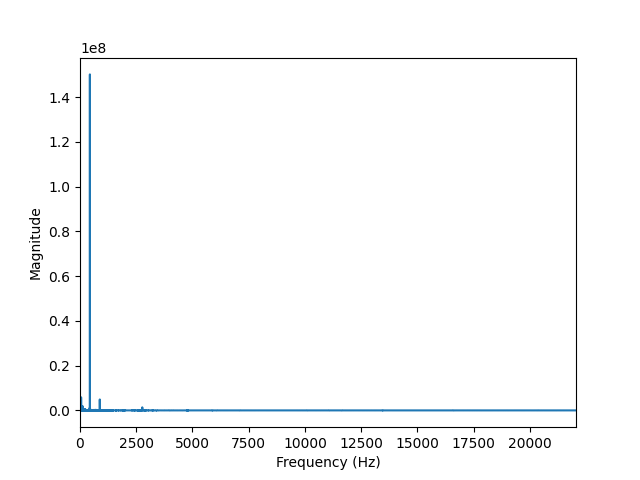

In [472]:
freq_vect=np.linspace(0, Fs, len(xvect))
xvectfft = np.fft.fft(xvect)
plt.figure()
plt.plot(freq_vect, np.abs(xvectfft))
plt.xlim((0, Fs/2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

#### <u>1.3 Commenter : quelle est la fréquence fondamentale du son de diapason? En déduire la note jouée.

In [473]:
#

#### <u>1.4 Calculer la TFCT du signal 'diapason.wav' en fixant les paramètres :</u>
#### — <u>Nwin = 128,</u>
#### - <u>Nhop=Nwin/2,</u>
#### — <u>Nfft = X, avec X ∈ [128, 256, . . .] la valeur numérique choisie.</u>

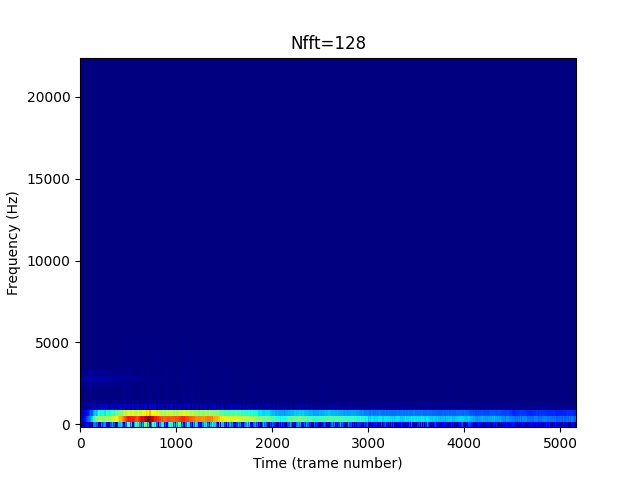

ValueError: could not broadcast input array from shape (128,) into shape (129,)

In [475]:
PATH='diapason.wav'
Nwin= 128
Nhop= Nwin//2
kkmax= 2
for kk in range(kkmax):
    Nfft=128*2**kk
    t_tfct_vect,f_tfct_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    # print(t_tfct_vect.size, (f_tfct_vect).size, xmat.shape)
    plt.figure()
    plt.pcolormesh(t_tfct_vect, f_tfct_vect, np.abs(xmat), cmap='jet')
    plt.title(f'Nfft={Nfft}')
    plt.xlabel('Time (trame number)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

#### <u>1.5 Comment l'augmentation de Nfft affecte-t-elle le spectrogramme ?

In [ ]:
# 

#### <u>1.6 Pour chaque valeur de Nfft, tracer le spectre d’amplitude d'une trame judicieusement choisie, et observer le contenu basse fréquence.

In [ ]:
ttrame0=...# instant de la trame choisie
Nwin=
Nhop=
kkmax=
for kk in range(0,kkmax):
    Nfft=128*2**kk
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    indtrame0=np.argmin(np.abs(t_tfct_vect-ttrame))
    trame0=xmat[...]
    freq_vect=np.linspace(...)
    trame0_fft=np.fft.fft(...)
    plt...
    plt.xlim(())



SyntaxError: invalid syntax (1241415385.py, line 2)

#### <u>1.7 Pour chaque valeur de Nfft, relever la fréquence où se trouve le maximum du module de la TFD.

In [ ]:

#

#### <u>1.8 Tracer la fréquence fondamentale en fonction de Nfft. Commenter.

In [ ]:
ttrame0=...# instant de la trame choisie
Nwin=
Nhop=
kkmax=
Nfft_vect=np.zeros(kkmax)
FreqFond_vect=np.zeros(kkmax)

for kk in range(0,kkmax):
    Nfft=128*2**kk
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    indtrame0=np.argmin(np.abs(t_tfct_vect-ttrame))
    trame0=xmat[...]
    freq_vect=np.linspace(...)
    trame0_fft=np.fft.fft(...)
    FreqFond_vect[kk]=np.max(np.abs(trame0_fft[0:int(Nfft/2)]))
    Nfft_vect[kk]=Nfft

plt ...

#### <u>1.9 Charger et écouter le fichier 'piano.wav', tracer sa TFD et commenter : quelle est la fréquence fondamentale du son de piano? En déduire la note jouée.

In [ ]:
PATH='piano.wav'
Fs,x_vect = wav.read(PATH)
sd.play()
freq_vect =
x_vect_fft =
plt


#### <u>1.10 Calculer la TFCT du signal 'piano.wav' en fixant les paramètres :</u>
#### — <u>Nwin = 128,</u>
#### - <u>Nhop=Nwin/2,</u>
#### — <u>Nfft = X, avec X ∈ [128, 256, . . .] la valeur numérique choisie.</u>

In [ ]:
PATH='piano.wav'

Nwin=
Nhop=
kkmax=
for kk in range(0,kkmax):
    Nfft=128*2**kk
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    plt.figure()
    plt.pcolormesh(..)
    plt.show()

#### <u>1.11 Pour chaque valeur de Nfft, tracer le spectre d’amplitude d'une trame judicieusement choisie, et observer le contenu basse fréquence.

In [ ]:
ttrame0=...# instant de la trame choisie
Nwin=
Nhop=
kkmax=
for kk in range(0,kkmax):
    Nfft=128*2**kk
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    indtrame0=np.argmin(np.abs(t_tfct_vect-ttrame))
    trame0=xmat[...]
    freq_vect=np.linspace(...)
    trame0_fft=np.fft.fft(...)
    plt...
    plt.xlim(())


#### <u>1.12 L'augmentation de Nfft permet-elle d’améliorer la lecture de la fréquence fondamentale ? Conclure sur les conditions nécessaires et suffisantes pour mesurer la fréquence fondamentale du son.

In [ ]:
#

### 2. Résolution fréquentielle
#### <u>2.1 Afficher la TFCT du fichier piano.wav en fixant Nwin = Nfft= X et Nhop = Nwin/2, pour X = [128, 256, 512, ..., ] 

In [ ]:
PATH='piano.wav'
kkmax=
for kk in range(0,kkmax):
    Nfft=128*2**kk
    Nwin=
    Nhop=
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    plt.figure()
    plt.pcolormesh(..)
    plt.show()


#### <u>2.2 Comment l'augmentation simultanée de Nwin et Nfft affecte-t-elle le spectrogramme ?

In [ ]:
#

#### <u>2.3 Pour chaque valeur de X (i.e. de Nwin et Nfft), tracer le spectre d’amplitude d'une trame judicieusement choisie.

In [ ]:
ttrame0=...# instant de la trame choisie
kkmax=
for kk in range(0,kkmax):
    Nfft=128*2**kk
    Nwin=
    Nhop=
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    indtrame0=np.argmin(np.abs(t_tfct_vect-ttrame))
    trame0=xmat[...]
    freq_vect=np.linspace(...)
    trame0_fft=np.fft.fft(...)
    plt...
    plt.xlim(())

#### <u>3.3 Commenter l'allure des spectres obtenus en fonction du choix de X (i.e. Nfft et Nwin). A partir de quelle valeur peut on distinguer la fréquence fondamentale des harmoniques du son ? Conclure sur les conditions nécessaires et suffisantes pour mesurer la fréquence fondamentale du son.

In [ ]:
#

### 3. Résolution temporelle
#### <u>3.1 Calculer la TFCT du signal piano.wav en choisissant les paramètres comme suit :</u>
#### — <u>Nwin = 1024,</u>
#### — <u>Nfft = 2048, </u>
#### — <u>Nhop = X, avec X ∈ [64, 128, 256, . . .] la valeur numérique choisie.</u>

In [ ]:
PATH='piano.wav'
Nwin=
Nfft=
kkmax=# Attention à ne pas dépasser Nwin/2 !!! (cf cours OLA)
for kk in range(0,kkmax):
    Nhop=64*2**kk
    t_tfct_vect,freq_vect,xmat = TFCT(PATH,Nwin,Nhop,Nfft)
    plt.figure()
    plt.pcolormesh(..)
    plt.show()

#### <u>3.2 Commenter l’effet de Nhop sur l’allure du spectrogramme. Conclure.

In [ ]:
#